In [15]:
#The purpose of this project is to find what fields in the given dataset correlates the most with a movie's 
#gross earnings.

#Import all required packages and import the data:


import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'/Users/golnooshteymoori/Downloads/movies 2.csv')

In [5]:
#Let's take a look at the data.


df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [16]:
#We will now start cleaning the data before we start any analysis. Cleaning will comprise of:

#Checking for null values.
# Changing some datatypes for clarity.
#Sorting the data by gross revenue.
#Removing duplicates.
#Numerizing any ordinal data.
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [6]:
# for missing data
for col in df.columns:
    missing_data=np.mean(df[col].isnull())
    print('{} -{}%'.format(col,missing_data))
    


name -0.0%
rating -0.010041731872717789%
genre -0.0%
year -0.0%
released -0.0002608242044861763%
score -0.0003912363067292645%
votes -0.0003912363067292645%
director -0.0%
writer -0.0003912363067292645%
star -0.00013041210224308815%
country -0.0003912363067292645%
budget -0.2831246739697444%
gross -0.02464788732394366%
company -0.002217005738132499%
runtime -0.0005216484089723526%


In [7]:
# for columns dtypes
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [17]:
#There appears to be a few missing values in most of the columns. These null values are not required. So we will drop them.
df=df.dropna()

In [18]:
#change the data type for some columns
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [19]:
#Extracting the year from the date, and adding acolumn
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,1980


In [20]:
# Sort values
df=df.sort_values(by=['gross'], inplace=False,ascending=False)

In [10]:
pd.set_option('display.max.row',None)

In [11]:
df['company'].drop_duplicates().sort_values(ascending=False).head()

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

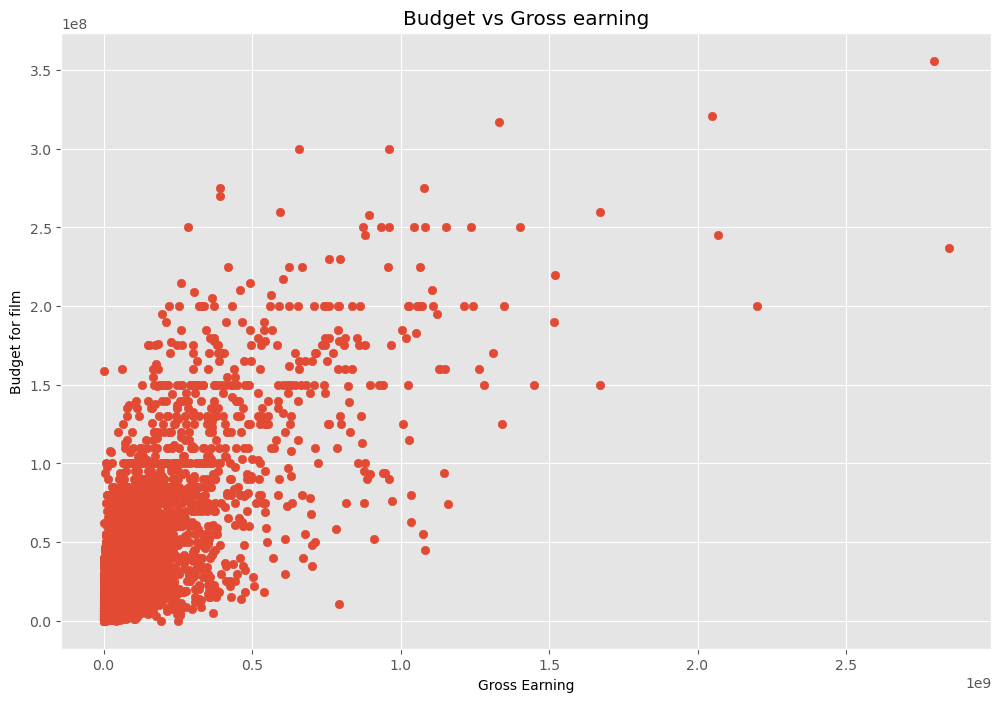

In [21]:
#Let's now start the analysis. We will compare gross revenue to all other numerical values in the dataset
#and use correlation coefficents to see what correlates best with gross revenue.

#Let's make a few scatterplots of gross revenue and all some numerical fields to see if there are any linear
#relationships.
plt.scatter(x=df['gross'],y=df['budget'])
plt.title('Budget vs Gross earning')
plt.xlabel('Gross Earning')
plt.ylabel('Budget for film')
plt.show()

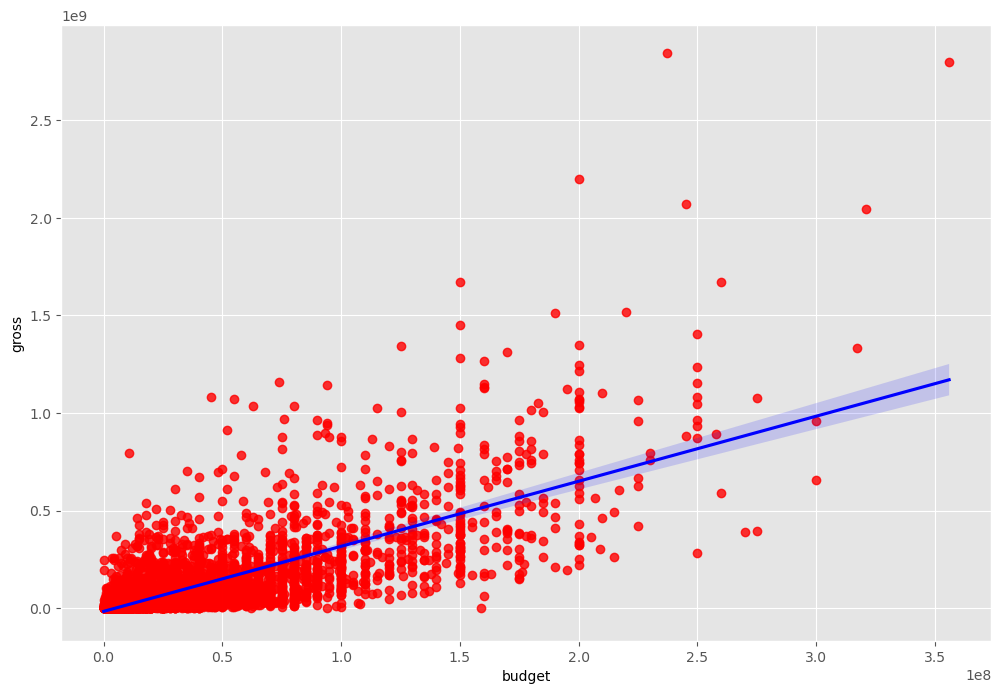

In [65]:
sns.regplot(x='budget', y='gross', data=df,scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.show()

In [23]:
#Now that we have had a look at how the data behaves, let's look at the correlation coefficients between 
#the various numerical
data.df.corr()

/var/folders/f_/vt2dc3qx64jdwn68cdntnbbm0000gn/T/ipykernel_1267/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


/var/folders/f_/vt2dc3qx64jdwn68cdntnbbm0000gn/T/ipykernel_1267/3541525397.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


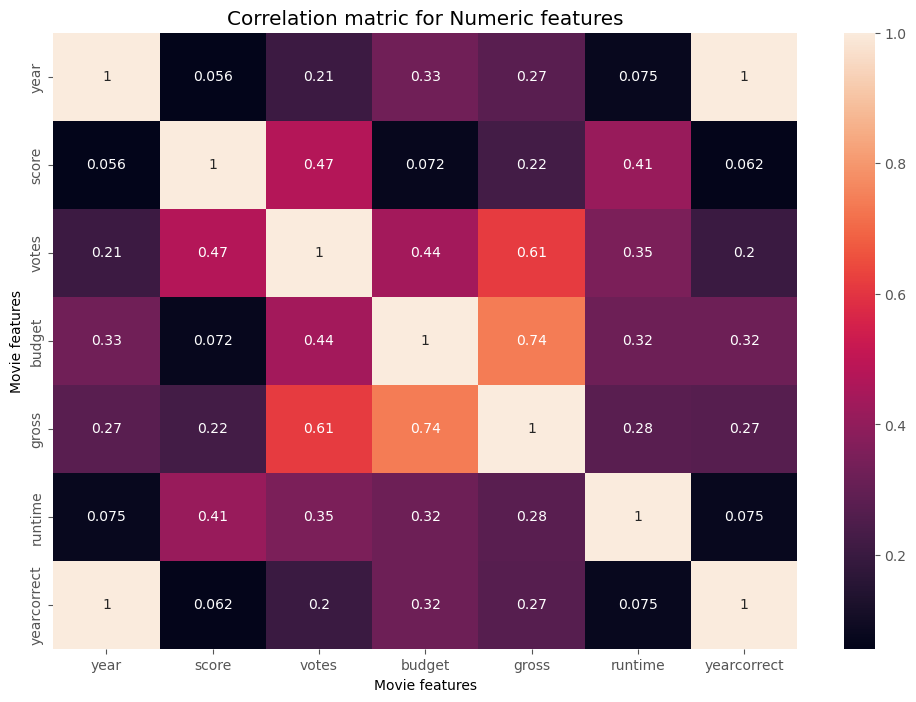

In [25]:
#Judging by the above table, there is a fairly high correlation between budget and gross earnings

#For more clarity, let's make a heat map of the correlations between different numerical "Movie Features"
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation matric for Numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [17]:
# converting none-numeric metrics to the numberic to be able to see all the correlations
df_numerised=df

for col in df_numerised.columns:
    if df_numerised[col].dtype=='object' :
        df_numerised[col]= df_numerised[col].astype('category')
        df_numerised[col]= df_numerised[col].cat.codes
            
     
    
    
    
df_numerised.head(10)         

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000.0,46998772.0,1426,146.0,1980
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000.0,58853106.0,452,104.0,1980
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000.0,538375067.0,945,124.0,1980
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000.0,83453539.0,1108,88.0,1980
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000.0,39846344.0,1083,98.0,1980
5,1509,6,9,1980,1922,6.4,123000.0,1758,3081,155,47,550000.0,39754601.0,1108,95.0,1980
6,3930,6,0,1980,1359,7.9,188000.0,974,576,860,47,27000000.0,115229890.0,1397,133.0,1980
7,3122,6,3,1980,530,8.2,330000.0,1269,1257,1469,47,18000000.0,23402427.0,390,129.0,1980
8,3732,4,0,1980,1346,6.8,101000.0,1606,1402,595,47,54000000.0,108185706.0,548,127.0,1981
9,4401,6,3,1980,1755,7.0,10000.0,2011,280,402,47,10000000.0,15795189.0,1391,100.0,1980


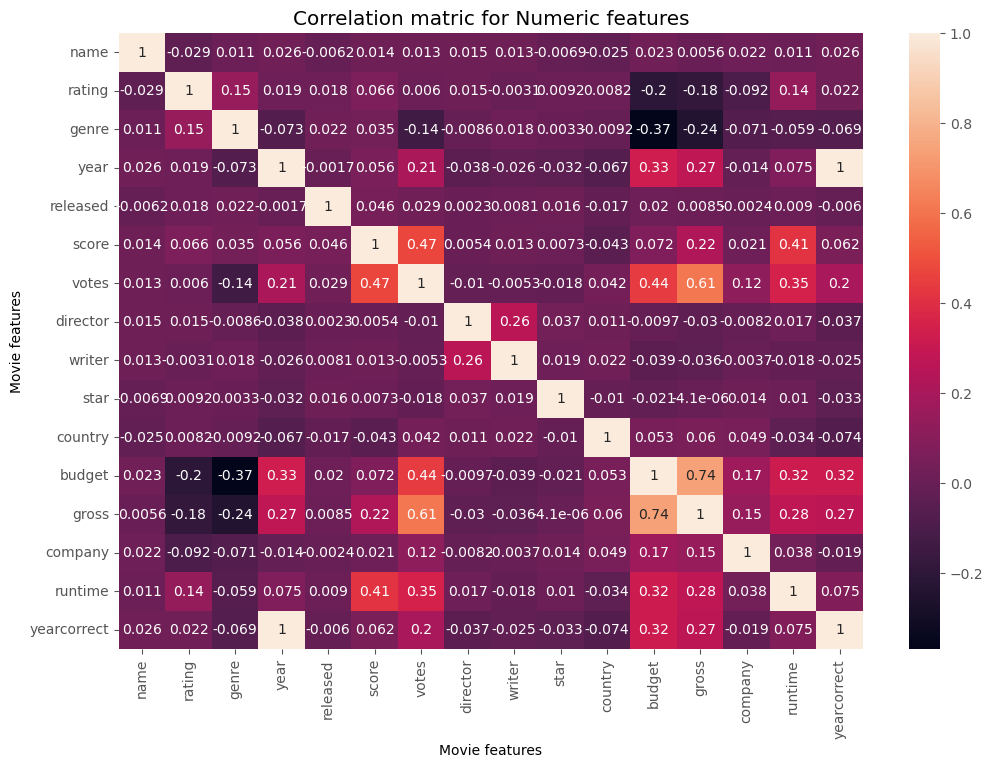

In [73]:
# check the correlation between metrics
sns.heatmap(df_numerised.corr(), annot=True)
plt.title('Correlation matric for Numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [15]:
#Let's summarize the data by unstacking the above table:

Sorted_pairs=df_numerised.corr().unstack().sort_values()
Sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [81]:
#  Filter all the data with high correlation
    filtered_pairs=Sorted_pairs[(Sorted_pairs)>0.5]
filtered_pairs

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64